In [1]:
install.packages('biotools')
# 등분산검정을 위한 패키지

also installing the dependencies 'LearnBayes', 'deldir', 'coda', 'expm', 'sp', 'maptools', 'spdep', 'RcppArmadillo', 'rpanel', 'tkrplot', 'SpatialEpi'



package 'LearnBayes' successfully unpacked and MD5 sums checked
package 'deldir' successfully unpacked and MD5 sums checked
package 'coda' successfully unpacked and MD5 sums checked
package 'expm' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'maptools' successfully unpacked and MD5 sums checked
package 'spdep' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'rpanel' successfully unpacked and MD5 sums checked
package 'tkrplot' successfully unpacked and MD5 sums checked
package 'SpatialEpi' successfully unpacked and MD5 sums checked
package 'biotools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\15U560\AppData\Local\Temp\RtmpuQFFg1\downloaded_packages


In [2]:
library(biotools)
boxM(iris[1:4], iris$Species)

Loading required package: rpanel
Loading required package: tcltk
Package `rpanel', version 1.1-3: type help(rpanel) for summary information
Loading required package: tkrplot
Loading required package: MASS
Loading required package: lattice
Loading required package: SpatialEpi
Loading required package: sp


---
biotools version 3.1



	Box's M-test for Homogeneity of Covariance Matrices

data:  iris[1:4]
Chi-Sq (approx.) = 140.94, df = 20, p-value < 2.2e-16


### 귀무가설(등분산 가정)이 기각 --> QDA 실시

In [4]:
iris <- read.csv('iris.csv')

In [5]:
set.seed(11)
N <- nrow(iris)
tr.idx <- sample(1:N, size = N*2/3, replace = FALSE)

In [6]:
iris.train <- iris[tr.idx, -5]
iris.test <- iris[-tr.idx, -5]
trainLabels <- iris[tr.idx, 5]
testLabels <- iris[-tr.idx, 5]

In [8]:
train <- iris[tr.idx, ]
test <- iris[-tr.idx, ]

In [9]:
iris.qda <- qda(Species ~., data = train, prior=c(1/3, 1/3, 1/3))
iris.qda

Call:
qda(Species ~ ., data = train, prior = c(1/3, 1/3, 1/3))

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa         4.991667    3.397222     1.472222   0.2527778
versicolor     5.952941    2.758824     4.276471   1.3382353
virginica      6.696667    3.026667     5.666667   2.0366667

In [10]:
testpredq <- predict(iris.qda, test)
testpredq

,setosa,versicolor,virginica
6,1.000000e+00,6.987569e-38,3.021057e-34
9,1.000000e+00,9.254663e-26,8.360768e-26
17,1.000000e+00,1.665712e-45,2.600892e-39
19,1.000000e+00,8.947302e-39,2.296706e-36
20,1.000000e+00,1.080541e-39,5.340908e-35
23,1.000000e+00,1.793521e-41,2.880975e-34
26,1.000000e+00,3.083004e-26,9.148862e-28
30,1.000000e+00,3.962252e-28,2.749000e-27
33,1.000000e+00,2.357730e-48,4.152369e-40
36,1.000000e+00,6.153625e-36,2.180180e-34


In [12]:
library(gmodels)
CrossTable(x=testLabels, y=testpredq$class, prop.chisq = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  50 

 
             | testpredq$class 
  testLabels |     setosa | versicolor |  virginica |  Row Total | 
-------------|------------|------------|------------|------------|
      setosa |         14 |          0 |          0 |         14 | 
             |      1.000 |      0.000 |      0.000 |      0.280 | 
             |      1.000 |      0.000 |      0.000 |            | 
             |      0.280 |      0.000 |      0.000 |            | 
-------------|------------|------------|------------|------------|
  versicolor |          0 |         15 |          1 |         16 | 
             |      0.000 |      0.938 |      0.062 |      0.320 | 
             |      0.000 |      1.000 |      0.048 |            | 
             |      0.000 |      0.300 |      0.020 |         

### 정확도 --> 98%  ,   오분류율 --> 2%

In [13]:
install.packages('klaR')

also installing the dependency 'combinat'



package 'combinat' successfully unpacked and MD5 sums checked
package 'klaR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\15U560\AppData\Local\Temp\RtmpuQFFg1\downloaded_packages


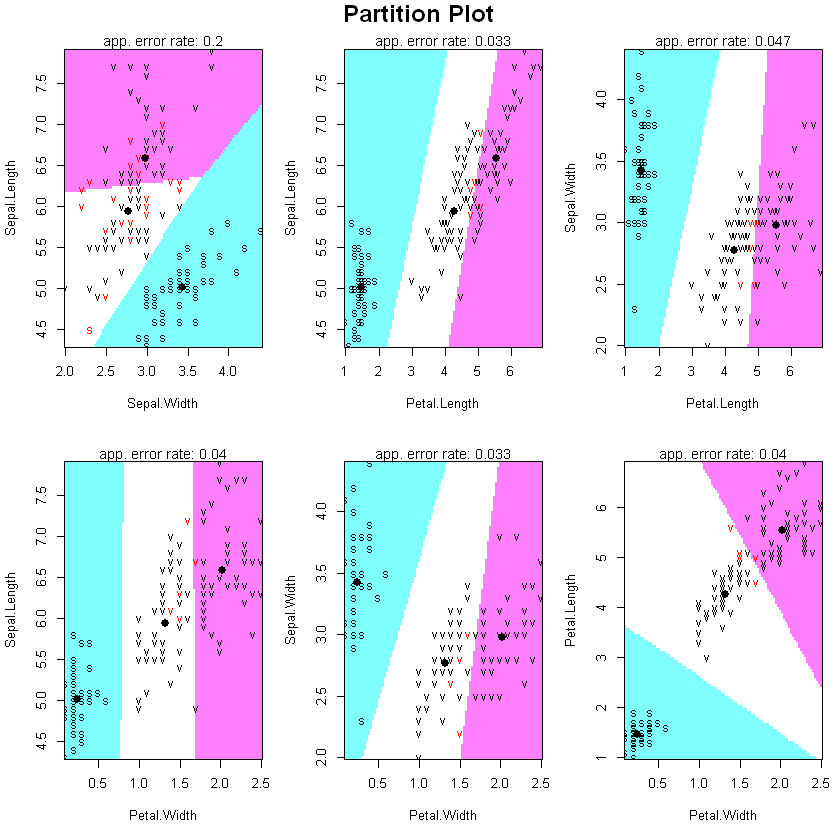

In [15]:
library(klaR)
partimat(as.factor(iris$Species) ~ ., data = iris, method = 'lda')

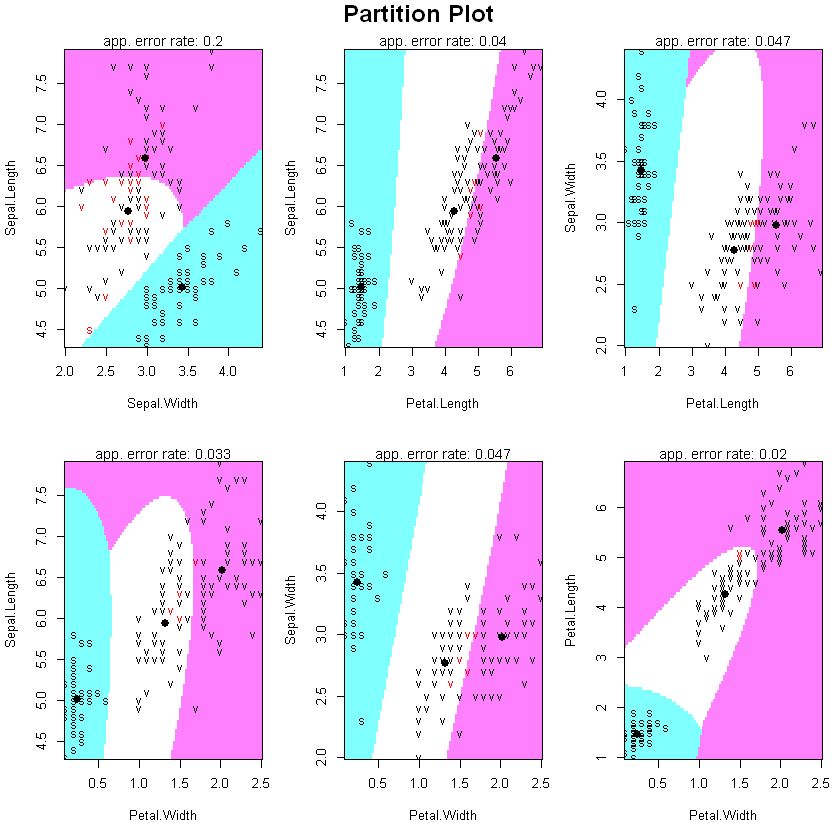

In [16]:
partimat(as.factor(iris$Species) ~., data=iris, method ='qda')

### 전체 데이터를 사용하면 qda를 사용하는것이 오분류가 적고 Petal.Length 와 Petal.Width가 중요한 변수이다.